Script to connect to twitter API and gather tweets

In [1]:
import io
import json
import nltk
import twitter

#Authentication and connecting to twitter API
CONSUMER_KEY = ''
CONSUMER_SECRET= ''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''


QUERY = 'india'


OUT_FILE = QUERY + ".json"

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_stream = twitter.TwitterStream(auth=auth)


print 'Filtering the public timeline for "{0}"'.format(QUERY)


stream = twitter_stream.statuses.filter(track=QUERY)

# Write one tweet per line as a JSON document.

with io.open(OUT_FILE, 'w', encoding='utf-8', buffering=1) as f:
    for tweet in stream:
        f.write(unicode(u'{0}\n'.format(json.dumps(tweet, ensure_ascii=False))))
        print tweet['text']



        "We have now gathered all the data"

ImportError: No module named twitter

In [2]:
import pandas as pd
import matplotlib as plt

In [3]:
file="/home/arjun/PycharmProjects/Twitter/india.json"

In [4]:


data = "[{0}]".format(",".join([l for l in open(file).readlines()]))

Creating a data frame

In [5]:
df = pd.read_json(data, orient='records')

In [6]:

print "Successfully imported", len(df), "tweets"

Successfully imported 18757 tweets


In [7]:
print df

       contributors coordinates          created_at display_text_range  \
0               NaN        None 2016-12-06 04:05:22                NaN   
1               NaN        None 2016-12-06 04:05:23                NaN   
2               NaN        None 2016-12-06 04:05:23                NaN   
3               NaN        None 2016-12-06 04:05:24                NaN   
4               NaN        None 2016-12-06 04:05:24                NaN   
5               NaN        None 2016-12-06 04:05:24                NaN   
6               NaN        None 2016-12-06 04:05:24           [0, 106]   
7               NaN        None 2016-12-06 04:05:24           [0, 114]   
8               NaN        None 2016-12-06 04:05:25                NaN   
9               NaN        None 2016-12-06 04:05:25          [13, 108]   
10              NaN        None 2016-12-06 04:05:26                NaN   
11              NaN        None 2016-12-06 04:05:26                NaN   
12              NaN        None 2016-1

In [8]:
limit_notices = df[pd.notnull(df.limit)]

Limit Notices are those limited by twitter because the API allows you to capture only 1% of the tweets. 

In [9]:
limit_notices

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user
18756,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


Remove null values and limit notices. 

In [10]:
df = df[pd.notnull(df['id'])]

In [11]:
print df

       contributors coordinates          created_at display_text_range  \
0               NaN        None 2016-12-06 04:05:22                NaN   
1               NaN        None 2016-12-06 04:05:23                NaN   
2               NaN        None 2016-12-06 04:05:23                NaN   
3               NaN        None 2016-12-06 04:05:24                NaN   
4               NaN        None 2016-12-06 04:05:24                NaN   
5               NaN        None 2016-12-06 04:05:24                NaN   
6               NaN        None 2016-12-06 04:05:24           [0, 106]   
7               NaN        None 2016-12-06 04:05:24           [0, 114]   
8               NaN        None 2016-12-06 04:05:25                NaN   
9               NaN        None 2016-12-06 04:05:25          [13, 108]   
10              NaN        None 2016-12-06 04:05:26                NaN   
11              NaN        None 2016-12-06 04:05:26                NaN   
12              NaN        None 2016-1

In [12]:
print "Number of total tweets that were rate-limited", sum([ln['track'] for ln in limit_notices.limit])
print "Total number of limit notices", len(limit_notices)

Number of total tweets that were rate-limited 1
Total number of limit notices 1


Some Time Series Analysis

In [13]:
df.set_index('created_at', drop=False, inplace=True)


In [14]:
print "Created date/time index on tweets"

Created date/time index on tweets


In [15]:
print "First tweet timestamp (UTC)", df['created_at'][0]
print "Last tweet timestamp (UTC) ", df['created_at'][-1]

First tweet timestamp (UTC) 2016-12-06 04:05:22
Last tweet timestamp (UTC)  2016-12-06 05:19:05


In [16]:
grouped = df.groupby(lambda x: x.hour)

print "Number of relevant tweets by the hour (UTC)"
print

for hour, group in grouped:
    print hour, len(group), '*'*(len(group) / 1000)

Number of relevant tweets by the hour (UTC)

4 13778 *************
5 4978 ****


In [17]:

def group_by_15_min_intervals(x):
    if   0 <= x.minute <= 15: return (x.hour, "0-15")
    elif 15 < x.minute <= 30: return (x.hour, "16-30")
    elif 30 < x.minute <= 45: return (x.hour, "31-45")
    else: return (x.hour, "46-00")


grouped = df.groupby(lambda x: group_by_15_min_intervals(x))

print "Number of relevant tweets by intervals (UTC)"
print

for interval, group in grouped:
    print interval, len(group), "\t", '*'*(len(group) / 200)


Number of relevant tweets by intervals (UTC)

(4, '0-15') 2344 	***********
(4, '16-30') 3847 	*******************
(4, '31-45') 4020 	********************
(4, '46-00') 3567 	*****************
(5, '0-15') 4177 	********************
(5, '16-30') 801 	****


In [18]:
from collections import Counter


user_col = df.pop('user').apply(pd.Series)

authors = user_col.screen_name

authors_counter = Counter(authors.values)

print
print "Most frequent (top 25) authors of tweets"
print '\n'.join(["{0}\t{1}".format(a, f) for a, f in authors_counter.most_common(25)])
print

# Get only the unique authors

num_unique_authors = len(set(authors.values))
print "There are {0} unique authors out of {1} tweets".format(num_unique_authors, len(df))


Most frequent (top 25) authors of tweets
khalidrafiq138	69
trendinaliaIN	36
CLASSI_BOOK	30
gdhanushkraja	29
lautanjobs	29
shasidsan	25
ANC_News2	25
MechanicalBaba	21
56perumal	21
Aruhisen20_Fair	21
akashdhamija1	20
ShaikShafi	20
wfhInd	19
Prabhakar2July	19
mw569256	18
worksforindia	18
Real_Trending	18
SbSdesi	18
AwareIndians	18
mohitsmartlove	17
NARPATSHETH	17
Cricketify_Live	16
CrweWorld	16
ranaalikash	16
AcheDinAaneWale	15

There are 13023 unique authors out of 18756 tweets


Count of Languages tweeted in

In [19]:
df.lang.value_counts()

en     16704
in       449
und      418
hi       398
es       244
tl        91
ta        90
it        62
pt        52
et        40
gu        20
ru        19
fr        17
ja        16
ht        15
mr        14
ro        12
da        11
ur        10
ml         9
te         8
kn         8
de         8
fi         5
nl         5
pl         5
eu         4
tr         3
fa         2
vi         2
ne         2
cy         2
sv         1
no         1
si         1
sl         1
is         1
bn         1
zh         1
hu         1
ar         1
cs         1
ko         1
Name: lang, dtype: int64

In [20]:
en_text = df[df['lang'] == 'en'].pop('text')
en_text

created_at
2016-12-06 04:05:22    RT @EleanorH2O: We do amazing work in #India o...
2016-12-06 04:05:23    RT @narendramodi: I bow to Dr. Babasaheb Ambed...
2016-12-06 04:05:23    RT @narendramodi: I bow to Dr. Babasaheb Ambed...
2016-12-06 04:05:24    RT @timesofindia: TN CM Jayalalithaa's death: ...
2016-12-06 04:05:24    India mourns the loss of a leader but the peop...
2016-12-06 04:05:24    RT @JaagAlerts: India unlikely to produce F16s...
2016-12-06 04:05:24    I have 450 new followers from India, Banglades...
2016-12-06 04:05:24    OMG! Customs Intercepts Container Of Jollof Ri...
2016-12-06 04:05:25    India Jayalalitha: Thousands mourn colourful p...
2016-12-06 04:05:25    @Ashwinyiyer Awaiting your film to arrive @ ne...
2016-12-06 04:05:26    RT @yashar: Friendly reminder: Pakistan and In...
2016-12-06 04:05:27    RT @SaranMufc_: Black day for India. #RIPJayal...
2016-12-06 04:05:27    Carnegie India 'where technology meets policy'...
2016-12-06 04:05:28    RT @TimesNow: VID

Most frequent word

In [97]:
from collections import Counter

tokens = []
for txt in en_text.values:
    tokens.extend([t.lower().strip(":,.") for t in txt.split()])
    
tokens_counter = Counter(tokens)

tokens_counter.most_common(50)

[(u'rt', 10362),
 (u'india', 9379),
 (u'to', 8393),
 (u'of', 7425),
 (u'in', 6259),
 (u'the', 5862),
 (u'a', 3547),
 (u'for', 3010),
 (u'and', 2835),
 (u'is', 2388),
 (u'on', 2244),
 (u'&amp;', 1870),
 (u'his', 1829),
 (u'will', 1602),
 (u'be', 1482),
 (u'babasaheb', 1435),
 (u"india's", 1385),
 (u'-', 1357),
 (u'i', 1312),
 (u'soulja', 1259),
 (u'was', 1197),
 (u'we', 1142),
 (u'as', 1113),
 (u'that', 1090),
 (u'from', 1043),
 (u'jayalalithaa', 1017),
 (u'by', 1011),
 (u'has', 969),
 (u'@narendramodi', 965),
 (u'this', 963),
 (u'at', 938),
 (u'tamil', 928),
 (u'india\u2019s', 918),
 (u'dr', 891),
 (u'now', 886),
 (u'have', 883),
 (u'with', 868),
 (u'ambedkar', 859),
 (u'#jayalalithaa', 831),
 (u'one', 826),
 (u'#india', 807),
 (u'leader', 753),
 (u'always', 752),
 (u'all', 752),
 (u'you', 716),
 (u'leaves', 693),
 (u'are', 692),
 (u'service', 687),
 (u'thankful', 673),
 (u'', 665)]

In [2]:
import nltk


In [3]:

nltk_text = nltk.Text(tokens)
nltk_text.collocations()

NameError: name 'tokens' is not defined

In [32]:
nltk_text.concordance("sad")
print
nltk_text.concordance("money")

Displaying 25 of 200 matches:
y chosen 24th? rt @poojakamal7 really sad news for people's of tamil nadu and o
e than one core peoples are crying so sad moring for us #jayalalithaa rt @dream
lalitha’s life… rt @irahsinha it is a sad loss 4 india n painful for t people o
t.co/zu7hzziwsa @gurmeetramrahim very sad for india rt @mamataofficial let us o
t @adityainsan4 @gurmeetramrahim very sad news 4 india rip #jayalalithaa rt @be
.co/wyzzemriyo rt @poojakamal7 really sad news for people's of tamil nadu and o
t @adityainsan4 @gurmeetramrahim very sad news 4 india rip #jayalalithaa rt @ke
rsity in #ind… rt @poojakamal7 really sad news for people's of tamil nadu and o
e than one core peoples are crying so sad moring for us #jayalalithaa rt @naren
addened rt @rajdipnakum i m also very sad to hear the news as she one of the mo
 &amp;aparna h… rt @varunkrish what a sad tweet from official handle of the par
hiindustanii @aiadmkofficial #ripamma sad tragic loss for tn and india god give
mo we @nee

In [38]:
entities = []
for txt in en_text.values:
    for t in txt.split():
        if t.startswith("http") or t.startswith("@") or t.startswith("#") or t.startswith("RT @"):
            if not t.startswith("http"):
                t = t.lower()
            entities.append(t.strip(" :,"))

entities_counter = Counter(entities)
for entity, freq in entities_counter.most_common()[:100]:
    print entity, freq

@narendramodi 960
#india 794
#jayalalithaa 744
#ripamma 585
@manakgupta 444
https://t.co… 318
@zephaniiiah 311
@dhume 276
#ammaforever 245
@indiatoday 244
#amma 220
@sushmaswaraj 210
#babrimasjid 183
@bbcbreaking 179
@ranaayyub 172
@jpnadda 159
@aiadmkofficial 151
https:… 145
@incindia 145
#ba… 128
https:/… 122
#raeestrailertomorrow 122
@nytimes 120
@indianexpress 118
#demonetisation 112
@gurmeetramrahim 111
https://… 109
https://t.co/waPwvDQPe2 109
@pmoindia 104
#trndnl 104
#shauryadiwas 103
#news 103
@trendsmapindia 102
@asad_umar 98
https://t… 91
@yogrishiramdev 90
@cnnnews18 88
#jayalalithaa. 87
@zeenews 85
@pepsi 84
@unilever 84
@nestle 84
@cocacola 84
@colgate 84
@trendinaliain 83
https… 79
@timesofindia 77
#trump 74
@ndtv 70
@superstarrajini 67
#tamilnadu 67
@sardesairajdeep 66
#jjayalalithaa 66
@offl_lawrence 66
https://t.co/KQzars5h7y 66
@arvindkejriwal 64
@sitaramyechury 63
@tarekfatah 63
@gauravpandhi 61
#ind… 60
http… 59
@pbhushan1 59
#200episodesofkrpkab 59
https://t.co/3a

# SMS SPAM Collection UCI Dataset

Import NLTK library that provides tools for Natural Language Processing

In [1]:
import nltk

In [2]:
# install "Brown" from NLTK corpus(collection of texts)
from nltk.corpus import brown
brown.words()

[u'The', u'Fulton', u'County', u'Grand', u'Jury', ...]

In [3]:
# Read the SMS Spam collection file and print the number of messages. We can see that it has 5574 messages. 
messages = [line.rstrip() for line in open('/home/arjun/Downloads/smsspamcollection/SMSSpamCollection')]
print (len(messages))

5574


In [6]:
# Here i am printing the first 5 messages and numbering them using enumerate for convenience. 
for message_no, message in enumerate(messages[:5]):
    print (message_no, message)
    print ('\n')

(0, 'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')


(1, 'ham\tOk lar... Joking wif u oni...')


(2, "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")


(3, 'ham\tU dun say so early hor... U c already then say...')


(4, "ham\tNah I don't think he goes to usf, he lives around here though")




### Converting into a DataFrame to make life easier. 

In [7]:
import pandas as pd
from pandas import Series,DataFrame

In [16]:
messages = pd.read_csv('/home/arjun/Downloads/smsspamcollection/SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Exploratory Data Analysis

In [10]:
#Getting some basic stats
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
#Using the groupby fucntion to describe and get basic stats seperately for ham and spam
messages.groupby('label').describe()

message
label                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

In [21]:
# Adding a new column to count the number of characters in each message. 
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
#Plots and Visualization

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

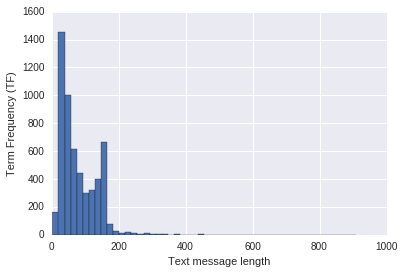

In [23]:
#plotting length of texts against number of texts. We can see that some are really long messages but almost all are less than 200 characters.
messages['length'].plot(bins=50,kind='hist')
plt.ylabel('Term Frequency (TF)')
plt.xlabel('Text message length')

In [24]:
#Getting general statistics for length. Its interesting to see that there is a message with 910 characters.  
messages.length.describe()

count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [25]:
# Looking at the message with 910 characters. 

messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

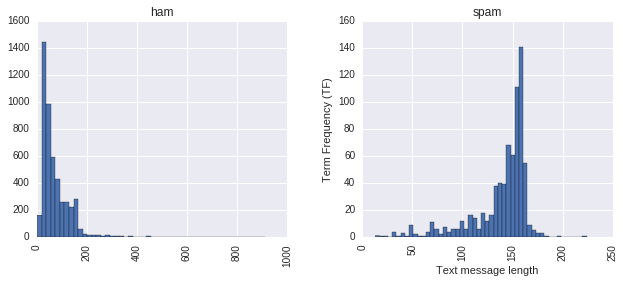

In [26]:
# plotting the length vs frequency seperately for labels 'Ham' and 'Spam'
messages.hist(column='length', by='label', bins=50,figsize=(10,4))
plt.ylabel('Term Frequency (TF)')
plt.xlabel('Text message length')

It is interesting to see that spam messages are longer than those that are not. 

### Text Pre-Processing with Python String

In [39]:
#Remove puncuations.
import string

mess = 'Sample. Hello! There is a punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [40]:
# Remove the common Engish words. NLTK calls them stopwords Some of them are shown below.
from nltk.corpus import stopwords
stopwords.words('english')[0:10] 

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your']

In [42]:
#Splitting the sample inut. 
nopunc.split()

['Sample', 'Hello', 'There', 'is', 'a', 'punctuation']

In [43]:

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [45]:
#Original Dataframe
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [73]:
# Check to make sure its working
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Vectorization using the bag-of-words model:
### 1.Count how many times does a word occur in each message (Known as term frequency)
### 2.Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
### 3.Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [46]:
#Using SciKit Learn's CountVectorizer. This will convert a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print (len(bow_transformer.vocabulary_))

/home/arjun/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:16: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


11425


In [60]:
message2 = messages['message'][1]
print (message2)

Ok lar... Joking wif u oni...


In [62]:
bow1 = bow_transformer.transform([message1])
print (bow1)
print (bow4.shape)

  (0, 1110)	1
  (0, 1483)	1
  (0, 2060)	1
  (0, 4653)	1
  (0, 5217)	1
  (0, 5218)	1
  (0, 5769)	1
  (0, 6217)	1
  (0, 6906)	1
  (0, 6937)	1
  (0, 7555)	1
  (0, 7668)	1
  (0, 8336)	1
  (0, 8917)	1
  (0, 10965)	1
  (0, 11163)	1
(1, 11425)


This shows that all words in this message are unique. 

In [63]:
#Using Bag-of-Words (bow) transformed object to entire DataFrame of messages
messages_bow = bow_transformer.transform(messages['message'])
print ('Shape of Sparse Matrix: ', messages_bow.shape)
print ('Amount of Non-Zero occurences: ', messages_bow.nnz)
print ('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

/home/arjun/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:16: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


('Shape of Sparse Matrix: ', (5572, 11425))
('Amount of Non-Zero occurences: ', 50548)
sparsity: 0.08%


### Perform TF-IDF

#### TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often 
#### used in information retrieval and text mining. 
#### TF- measures how frequently a term occurs in a document
#### TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
#### IDF-how important a word is to a document in a collection or corpus.
#### IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [66]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf1 = tfidf_transformer.transform(bow1)
print (tfidf1)

  (0, 11163)	0.230266855924
  (0, 10965)	0.190734285451
  (0, 8917)	0.247046523768
  (0, 8336)	0.170468692922
  (0, 7668)	0.264033840655
  (0, 7555)	0.312538562607
  (0, 6937)	0.183469241361
  (0, 6906)	0.151584746647
  (0, 6217)	0.189155577328
  (0, 5769)	0.24984711893
  (0, 5218)	0.268705938625
  (0, 5217)	0.298351840882
  (0, 4653)	0.312538562607
  (0, 2060)	0.242039602564
  (0, 1483)	0.312538562607
  (0, 1110)	0.288286201631


In [68]:
#Checking the IDF of words "cat"and "building"?
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['cat']])
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['building']])

8.23939442645
8.5270764989


In [69]:
# Transforming the entire bag-of-words corpus into TF-IDF corpus:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print (messages_tfidf.shape)

(5572, 11425)


### Model Building using Naive Bayes

In [76]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [83]:
#Predicting for the first message. It has done it correctly. 

print ('predicted:', spam_detect_model.predict(tfidf1)[0])
print ('expected:', messages.label[1])

('predicted:', 'ham')
('expected:', 'ham')


In [85]:
#All predictions for full databset
all_predictions = spam_detect_model.predict(messages_tfidf)
print (all_predictions)

['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


In [86]:
# Evaluating performance
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



### Spliting to testing and training datasets

In [90]:

%%time
from sklearn.cross_validation import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print (len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

(4457, 1115, 5572)
CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 20.4 ms


In [91]:

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [92]:
%%time
pipeline.fit(msg_train,label_train)

/home/arjun/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:16: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


CPU times: user 20.2 s, sys: 1.26 s, total: 21.5 s
Wall time: 21.5 s


Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x7f9b90bee7d0>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [93]:
%%time
predictions = pipeline.predict(msg_test)

/home/arjun/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:16: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


CPU times: user 5.05 s, sys: 276 ms, total: 5.33 s
Wall time: 5.33 s


In [94]:

%%time
print (classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1005
       spam       0.73      1.00      0.85       110

avg / total       0.97      0.96      0.97      1115

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 8.07 ms
